In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv("project_10.csv", index_col='date')

daily_returns = df.pct_change()
exp_ret = daily_returns.mean()*252
sigma = daily_returns.std()*np.sqrt(252)
print (exp_ret)
print (sigma)

adj_close    0.163411
dtype: float64
adj_close    0.202103
dtype: float64


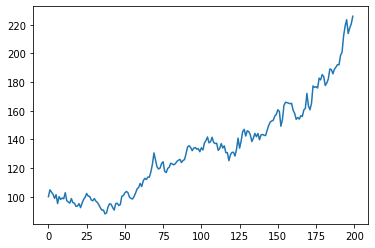

In [65]:
import numpy as np
from numpy.random import normal
np.random.seed(1)
T = 2
dt = 1/100.
S = np.zeros(shape=(100*2,))
S[0] = 100
for t in range(1, 100*2):
    S[t] = S[t-1]*np.exp((exp_ret - 0.5*sigma**2)*dt +
                        sigma*np.sqrt(dt)*normal())
    
from matplotlib import pyplot as plt
plt.plot(S)
plt.show()

In [66]:
from finmarkets import call

r = 0.03

d = {"K":[], "vol":[],
     "S":[], "ttm":[], "price":[]}
for K in np.arange(85, 115, 5):
    for sigma in np.arange(0.10, 0.30, 0.01):
        for S0 in S:
            for ttm in np.arange(0.5, 2.5, 0.5):
                d["K"].append(K)
                d["vol"].append(sigma)
                d["S"].append(S0)
                d["ttm"].append(ttm)
                d['price'].append(call(S0, K, 
                                       r, sigma, ttm))

df = pd.DataFrame(d)
df.to_csv('prova.csv')

In [67]:
df = pd.read_csv("prova.csv", index_col=0)
x = pd.concat([df.iloc[:, 0:1], df.iloc[:, 2:]],1).values
y = df.iloc[:, 1].values

In [68]:
from finnn import FinNN

trainer = FinNN("ANN")
trainer.setData(x, y, test_size=0.2)
trainer.normalize()

trainer.addInputLayer(inputs=4, neurons=10, activation='tanh')
#trainer.addHiddenLayer(neurons=10, activation='tanh')
trainer.addHiddenLayer(neurons=5, activation='tanh')
trainer.addOutputLayer(outputs=1, activation='tanh')

trainer.compileModel(loss='mse', opt='adam')

trainer.fit(epochs=1000, batch_size=100, verbose=1)

trainer.evaluate()

Epoch 1/1000
76800/76800 [==============================] - 4s 46us/step - loss: 0.1427
Epoch 2/1000
76800/76800 [==============================] - 2s 33us/step - loss: 0.0924
Epoch 3/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0916
Epoch 4/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0906
Epoch 5/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0887
Epoch 6/1000
76800/76800 [==============================] - 2s 30us/step - loss: 0.0850
Epoch 7/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0790
Epoch 8/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0720
Epoch 9/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0655
Epoch 10/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0611
Epoch 11/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0581
Epoch 12/1000
76800/76800 [===

76800/76800 [==============================] - 3s 33us/step - loss: 0.0224
Epoch 93/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0225
Epoch 94/1000
76800/76800 [==============================] - 3s 33us/step - loss: 0.0226
Epoch 95/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0227
Epoch 96/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0223
Epoch 97/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0227
Epoch 98/1000
76800/76800 [==============================] - 3s 33us/step - loss: 0.0224
Epoch 99/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0224
Epoch 100/1000
76800/76800 [==============================] - 3s 41us/step - loss: 0.0221
Epoch 101/1000
76800/76800 [==============================] - 3s 33us/step - loss: 0.0225
Epoch 102/1000
76800/76800 [==============================] - 3s 33us/step - loss: 0.0223
Epoch 103/1000
76800/76800 [====

76800/76800 [==============================] - 2s 32us/step - loss: 0.0203
Epoch 184/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0196
Epoch 185/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0196
Epoch 186/1000
76800/76800 [==============================] - 2s 33us/step - loss: 0.0200
Epoch 187/1000
76800/76800 [==============================] - 3s 34us/step - loss: 0.0197
Epoch 188/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0197
Epoch 189/1000
76800/76800 [==============================] - 3s 33us/step - loss: 0.0196
Epoch 190/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0200
Epoch 191/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0201
Epoch 192/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0197
Epoch 193/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0199
Epoch 194/1000
76800/7680

76800/76800 [==============================] - 3s 33us/step - loss: 0.0191
Epoch 274/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0187
Epoch 275/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0188
Epoch 276/1000
76800/76800 [==============================] - 3s 35us/step - loss: 0.0185: 0s - los
Epoch 277/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0188
Epoch 278/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0186
Epoch 279/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0187
Epoch 280/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0186
Epoch 281/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0188
Epoch 282/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0187
Epoch 283/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0188
Epoch 284/1000


76800/76800 [==============================] - 2s 31us/step - loss: 0.0181
Epoch 364/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0181
Epoch 365/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0180: 0s -
Epoch 366/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0181
Epoch 367/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0180
Epoch 368/1000
76800/76800 [==============================] - 4s 47us/step - loss: 0.0181
Epoch 369/1000
76800/76800 [==============================] - 3s 44us/step - loss: 0.0182
Epoch 370/1000
76800/76800 [==============================] - 3s 44us/step - loss: 0.0178
Epoch 371/1000
76800/76800 [==============================] - 3s 36us/step - loss: 0.0179
Epoch 372/1000
76800/76800 [==============================] - 3s 41us/step - loss: 0.0181
Epoch 373/1000
76800/76800 [==============================] - 4s 51us/step - loss: 0.0177
Epoch 374/1000
7680

76800/76800 [==============================] - 2s 32us/step - loss: 0.0177
Epoch 455/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0178
Epoch 456/1000
76800/76800 [==============================] - 3s 39us/step - loss: 0.0177
Epoch 457/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0180
Epoch 458/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0172
Epoch 459/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0177
Epoch 460/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0180
Epoch 461/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0173
Epoch 462/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0179
Epoch 463/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0174
Epoch 464/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0185
Epoch 465/1000
76800/7680

76800/76800 [==============================] - 2s 32us/step - loss: 0.0169
Epoch 546/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0171
Epoch 547/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0178
Epoch 548/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0170
Epoch 549/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0174
Epoch 550/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0169
Epoch 551/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0174
Epoch 552/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0173
Epoch 553/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0171
Epoch 554/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0175
Epoch 555/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0174
Epoch 556/1000
76800/7680

76800/76800 [==============================] - 3s 35us/step - loss: 0.0173
Epoch 636/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0169
Epoch 637/1000
76800/76800 [==============================] - 3s 33us/step - loss: 0.0171
Epoch 638/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0173
Epoch 639/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0171
Epoch 640/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0167
Epoch 641/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0178
Epoch 642/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0170
Epoch 643/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0170
Epoch 644/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0176
Epoch 645/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0171
Epoch 646/1000
76800/7680

76800/76800 [==============================] - 2s 32us/step - loss: 0.0177
Epoch 727/1000
76800/76800 [==============================] - 2s 33us/step - loss: 0.0171
Epoch 728/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0172
Epoch 729/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0168
Epoch 730/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0167
Epoch 731/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0168
Epoch 732/1000
76800/76800 [==============================] - 3s 33us/step - loss: 0.0166
Epoch 733/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0167
Epoch 734/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0168
Epoch 735/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0175
Epoch 736/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0172
Epoch 737/1000
76800/7680

Epoch 817/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0164
Epoch 818/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0167
Epoch 819/1000
76800/76800 [==============================] - 3s 38us/step - loss: 0.0165
Epoch 820/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0164
Epoch 821/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0165
Epoch 822/1000
76800/76800 [==============================] - 3s 34us/step - loss: 0.0171
Epoch 823/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0166
Epoch 824/1000
76800/76800 [==============================] - 2s 32us/step - loss: 0.0167
Epoch 825/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0172
Epoch 826/1000
76800/76800 [==============================] - 3s 33us/step - loss: 0.0172
Epoch 827/1000
76800/76800 [==============================] - 2s 31us/step - loss: 0.0169
Epoch 828/

KeyboardInterrupt: 